In [1]:
from langgraph.graph import StateGraph,START,END
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from typing import TypedDict

In [2]:
load_dotenv()

True

In [18]:
model = ChatGoogleGenerativeAI(
    model='gemini-2.5-flash',
    temperature=0
)

In [19]:
class BlogState(TypedDict):

    title:str
    outline:str
    content:str
    evalution:str

In [20]:
def create_outline(state:BlogState)->BlogState:
    title=state['title']

    prompt=f'Generate a detail outline for a blog on the topic -{title}'

    outline=model.invoke(prompt).content

    state['outline']=outline

    return state

In [21]:
def create_blog(state:BlogState)->BlogState:

    title=state['title']
    outline=state['outline']

    prompt=f'Write a detail a blog on the title-{title} using following outline \n {outline}'

    content=model.invoke(prompt).content

    state['content']=content

    return state

In [22]:
def evaluate_blog(state:BlogState)->BlogState:

    outline=state['outline']
    content=state['content']

    prompt=f'evaluate my blog -{content} based on my give outline -{outline} and give a details analysis and final score of this blog out of 100%'

    evalution=model.invoke(prompt)

    state['evalution']=evalution

    return state

In [24]:
graph=StateGraph(BlogState)

# nodes
graph.add_node('create_outline',create_outline)
graph.add_node('create_blog',create_blog)
graph.add_node('evaluate_blog',evaluate_blog)

#edges
graph.add_edge(START,'create_outline')
graph.add_edge('create_outline','create_blog')
graph.add_edge('create_blog','evaluate_blog')
graph.add_edge('evaluate_blog',END)

# complie
workflow=graph.compile()

In [ ]:
intial_state={'title':'Cricket'}
final_state=workflow.invoke(intial_state)

print(final_state['evalution'])

content='This blog post is **exceptionally well-written and adheres almost perfectly to the detailed outline you provided.** It\'s clear, engaging, and comprehensive, hitting every single point you intended.\n\nHere\'s a detailed analysis:\n\n---\n\n## Detailed Evaluation of "Cricket: More Than Just a Game – A Global Phenomenon"\n\n**Overall Impression:**\nThis blog post is a fantastic piece of content. It\'s meticulously structured, following your outline with impressive precision. The language is engaging, informative, and enthusiastic, making a complex sport accessible to a general audience while still providing depth for existing fans. The flow is logical, and the tone is consistently appreciative of cricket\'s multifaceted nature.\n\n---\n\n### Section-by-Section Breakdown:\n\n**I. Introduction: The Thwack of Willow and the Roar of the Crowd**\n*   **A. Catchy Hook:** **Excellent.** Directly uses your suggested hook and question: "The thwack of leather on willow, the roar of a sta

In [27]:
print(final_state['outline'])

Here's a detailed outline for a blog post on the topic of "Cricket," designed to be engaging, informative, and cover various facets of the sport.

---

## Blog Post Title: Cricket: More Than Just a Game – A Global Phenomenon

**Target Audience:** General audience, sports enthusiasts, those curious about cricket, potential new fans.

**Tone:** Engaging, informative, enthusiastic, appreciative of the sport's depth.

---

### I. Introduction: The Thwack of Willow and the Roar of the Crowd

*   **A. Catchy Hook:**
    *   Start with a vivid image or sound: "The thwack of leather on willow, the roar of a stadium, the tension of a last-ball finish..."
    *   Pose a question: "What sport captivates billions, spans continents, and boasts a history as rich as its intricate rules?"
*   **B. Brief Overview of Cricket:**
    *   Introduce it as a bat-and-ball game played between two teams of eleven players.
    *   Mention its global reach, particularly in Commonwealth nations.
*   **C. Thesis St

In [28]:
print(final_state['content'])

## Cricket: More Than Just a Game – A Global Phenomenon

**The thwack of leather on willow, the roar of a stadium, the tension of a last-ball finish...** What sport captivates billions, spans continents, and boasts a history as rich as its intricate rules? Welcome to the world of cricket, a bat-and-ball game played between two teams of eleven players that has transcended its origins to become a global obsession, particularly in Commonwealth nations. This blog post will delve into the fascinating world of cricket, exploring its rich history, diverse formats, cultural significance, and what truly makes it an enduring global phenomenon.

---

### I. The Basics: Understanding the "Gentleman's Game"

At its heart, cricket is a strategic contest where two teams of eleven players compete to score more runs than the opponent. One team bats, aiming to score runs, while the other bowls and fields, trying to get the batsmen out.

**A. Key Equipment & Field:**
The game revolves around a few essent

In [29]:
print(final_state['evalution'])

content='This blog post is **exceptionally well-written and adheres almost perfectly to the detailed outline you provided.** It\'s clear, engaging, and comprehensive, hitting every single point you intended.\n\nHere\'s a detailed analysis:\n\n---\n\n## Detailed Evaluation of "Cricket: More Than Just a Game – A Global Phenomenon"\n\n**Overall Impression:**\nThis blog post is a fantastic piece of content. It\'s meticulously structured, following your outline with impressive precision. The language is engaging, informative, and enthusiastic, making a complex sport accessible to a general audience while still providing depth for existing fans. The flow is logical, and the tone is consistently appreciative of cricket\'s multifaceted nature.\n\n---\n\n### Section-by-Section Breakdown:\n\n**I. Introduction: The Thwack of Willow and the Roar of the Crowd**\n*   **A. Catchy Hook:** **Excellent.** Directly uses your suggested hook and question: "The thwack of leather on willow, the roar of a sta

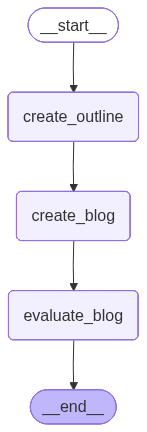

In [30]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())